# Esercitazione

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

## Comprensione del codice

### Esercizio 1

In [2]:
a, b = [4, 8, 12, 16], [3, 2, 6]
out = np.zeros((len(a), len(b)))
for i, v_a in enumerate(a):
    for j, v_b in enumerate(b):
        if v_a % v_b == 0:
            out[i,j] = 1

In [3]:
print(out)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


### Esercizio 2

In [4]:
class A:
    def __init__(self, x):
        self.x = x
    def execute(self):
        return np.power(self.x, 2)
class B(A):
    def execute(self):
        return np.power(self.x, 4)
a, b = A(3), B(2)

In [5]:
print(a.execute() - b.execute())

-7


### Esercizio 3

In [6]:
a = {'x': lambda x: 2*x, 'y': lambda y: y / 2}
k = [a['x'](i) - a['y'](i) for i in range(6)]

In [7]:
print(k)

[0.0, 1.5, 3.0, 4.5, 6.0, 7.5]


## Programmazione

### Fibonacci
Definire un programma iterativo che generi la serie di Fibonacci fino a un valore $N$.

Se ricorda che la struttura generale della serie è:

$$
f_n = f_{n-1} + f_{n-2}
$$

Mostrare poi in un grafico la funzione generata dalla serie e la sua cumulata

In [8]:
N = 2000
x, y = 0, 1
fibo = [x, y]
while True:
    n = fibo[-1] + fibo[-2]
    if n < N:
        fibo.append(n)
    else:
        break

In [9]:
import matplotlib.pyplot as plt

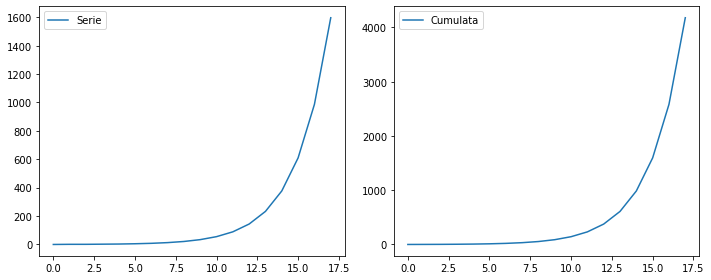

In [10]:
fig, ax = plt.subplots(figsize=(10, 4), ncols=2)
ax[0].plot(fibo, label='Serie')
ax[1].plot(np.cumsum(fibo), label='Cumulata')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.show()

### Edit Distance
**Problema:** date due stringhe $a$ e $b$, individuare una strategia per calcolare il numero minimo di operazioni necessario a trasformare $a$ in $b$, avendo come possibili operazioni l'inserimento di un carattere, la cancellazione di un carattere, e la sostituzione di un carattere.

<table>
    <tr><td></td><td>#</td><td>c</td><td>a</td><td>s</td><td>t</td><td>o</td></tr>
    <tr><td>#</td><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td></tr>
    <tr><td>c</td><td>1</td><td></td><td></td><td></td><td></td><td></td></tr>
    <tr><td>a</td><td>2</td><td></td><td></td><td></td><td></td><td></td></tr>
    <tr><td>s</td><td>3</td><td></td><td></td><td></td><td></td><td></td></tr>
    <tr><td>a</td><td>4</td><td></td><td></td><td></td><td></td><td></td></tr>
</table>

$E(i, j) = \min \{E(i-1, j) + 1; E(i, j-1) + 1; E(i-1,j-1) + k\}$, where 

$$
k = \left \{ \begin{matrix}
    1 & if\ s_1(i) \neq s_2(j)\\
    0 & otherwise 
    \end{matrix}
    \right .
$$

In [14]:
def show(m, a, b):
    return pd.DataFrame(m, index=list("#" + a), columns=list("#" + b))

In [20]:
a, b = 'cane', 'carte'
m = np.zeros((len(a) + 1, len(b) + 1))
m[0] = list(range(len(b) + 1))
m[:,0] = range(len(a)+1)

In [21]:
show(m, a, b)

,#,c,a,r,t,e
#,0.0,1.0,2.0,3.0,4.0,5.0
c,1.0,0.0,0.0,0.0,0.0,0.0
a,2.0,0.0,0.0,0.0,0.0,0.0
n,3.0,0.0,0.0,0.0,0.0,0.0
e,4.0,0.0,0.0,0.0,0.0,0.0


In [29]:
row_string, col_string = "#" + a, "#" + b
for i, row in enumerate(m[1:,:]):
    for j, value in enumerate(row[1:]):
        k = 0
        if row_string[i+1] != col_string[j+1]:
            k = 1
        new_value = min([
            m[i+1, j] + 1, m[i, j] + k, m[i, j+1] + 1
        ])
        m[i+1, j+1] = new_value

In [30]:
show(m, a, b)

,#,c,a,r,t,e
#,0.0,1.0,2.0,3.0,4.0,5.0
c,1.0,0.0,1.0,2.0,3.0,4.0
a,2.0,1.0,0.0,1.0,2.0,3.0
n,3.0,2.0,1.0,1.0,2.0,3.0
e,4.0,3.0,2.0,2.0,2.0,2.0


### Implement KMeans from scratch
Try a naive implementation of [KMeans](https://en.wikipedia.org/wiki/K-means_clustering) 

In [31]:
from sklearn.datasets import make_blobs

In [52]:
k = 3
X, y = make_blobs(n_samples=100, 
                  centers=k, n_features=2, 
                  random_state=0, cluster_std=.4)

In [53]:
X.shape

(100, 2)

In [54]:
X[:3]

array([[2.28590385, 0.81434416],
       [0.61808345, 4.45854833],
       [2.43416831, 0.83565962]])

In [55]:
import matplotlib.pyplot as plt

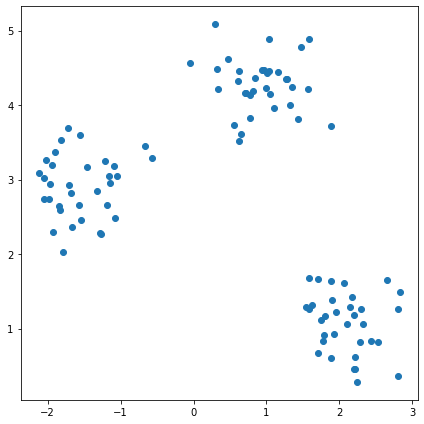

In [58]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1])
plt.tight_layout()
plt.show()

## Kmeans
1. Inizializzazione: stabilire k centri casuali

Ripeti:

2. Assegniamo ogni punto al centro più vicino
3. Spostare i centri verso il punto medio del cluster (formato al punto 2)
4. Calcolare RSS

### Strutture dati
- Punti: matrice (num x num variabili)
- Centri: matrice (k x num variabile)

In [142]:
C = np.random.randint(low=X.min(), 
                      high=X.max(), size=(k, 2))

In [143]:
C

array([[ 2, -1],
       [ 3,  0],
       [ 1,  2]])

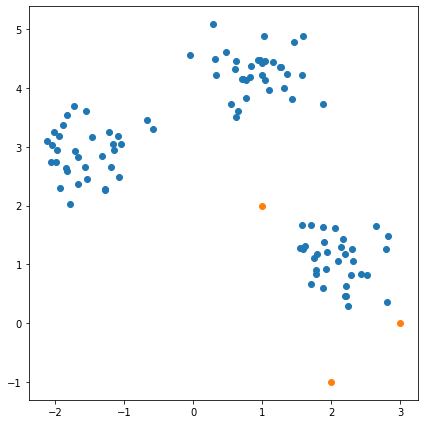

In [144]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1])
ax.scatter(C[:,0], C[:,1])
plt.tight_layout()
plt.show()

In [145]:
dist = lambda x, y: np.linalg.norm(x-y)

In [153]:
assignment = []
for point in X:
    distances = []
    for c in C:
        delta = dist(point, c)
        distances.append(delta)
    assignment.append(np.argmin(np.array(distances)))

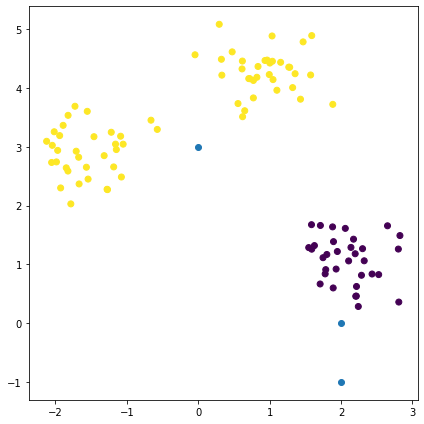

In [154]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=assignment)
ax.scatter(C[:,0], C[:,1])
plt.tight_layout()
plt.show()

In [155]:
Xdf = pd.DataFrame(X)
Xdf['cluster'] = assignment

In [156]:
for i, row in Xdf.groupby('cluster').mean().iterrows():
    C[i] = row.values

In [157]:
C

array([[ 2, -1],
       [ 2,  1],
       [ 0,  3]])

In [158]:
RSS = 0
for cluster in range(k):
    c = C[cluster]
    subset = Xdf[Xdf.cluster==cluster]
    partial_sum = 0
    for i, row in subset.iterrows():
        delta = dist(c, row.values[:2])
        partial_sum += delta
    RSS += partial_sum

In [159]:
RSS

124.76066739857654

In [160]:
from sklearn.cluster import KMeans

In [161]:
kmean = KMeans(n_clusters=k)
kmean.fit(X)
assignment = kmean.predict(X)

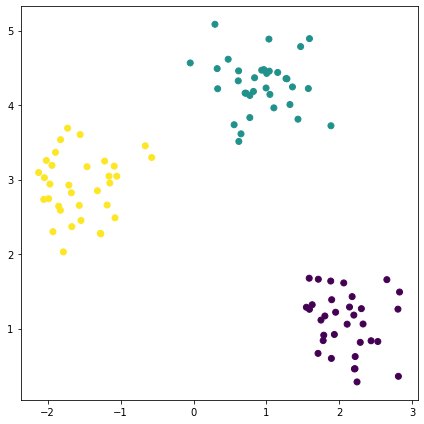

In [162]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=assignment)
plt.tight_layout()
plt.show()